In [5]:
from visualizeGrid_v1 import read_bands,aoi_zoom,plot_grid,plot_bands
from mapField import makeGrid
out_img = 'Bands/Barenbrug1_NDVI.tif'
in_red =  'Bands/Barenbrug1_RED.tif'
in_nir = 'Bands/Barenbrug1_NIR.tif'

/Users/jesselahaye/miniconda3/envs/geopy/lib/python3.6/site-packages/rasterio/__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)
/Users/jesselahaye/miniconda3/envs/geopy/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  This is separate from the ipykernel package so we can avoid doing imports until


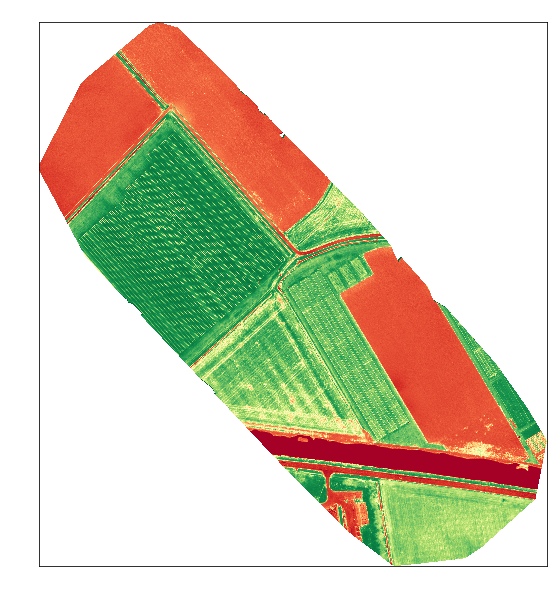

In [6]:
ndvi = read_bands(in_red,in_nir)   
band = 'Bands/Barenbrug1_NDVI.tif'
affine = plot_bands(out_img)

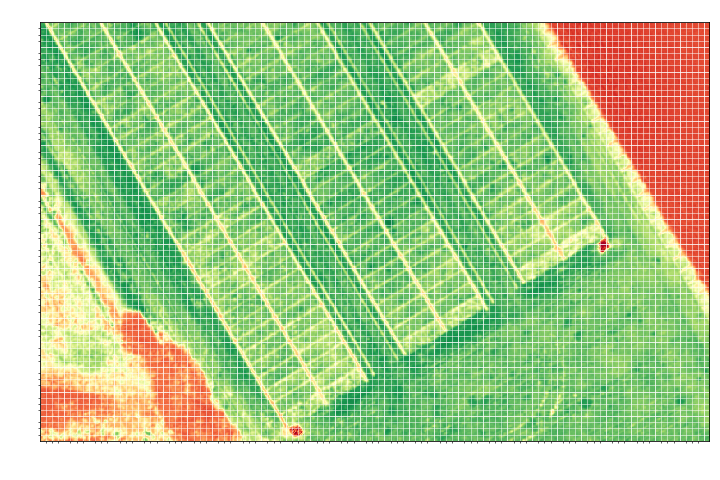

In [7]:
vert_ax = (4800,5300)
hor_ax = (4000,4800) 
ndviz,minx,maxx,miny,maxy = aoi_zoom(4000,4800,4800,5300,ndvi)

In [8]:
rows = 15
cols = 8
vert = 270
hor = 440
title = 'Test'
fig_x = 15
fig_y = 15
angle = 58
distance = 2
x_offset = 4540
y_offset = 4830
in_csv = 'test.csv'
out= 'Test_BB.geojson'
index = 'test_num'
apoly,poly = makeGrid(vert,hor,rows,cols,x_offset,y_offset,distance,angle,affine,out,index,in_csv)

(4169.614772411952, 4832.75593472078, 4680.322266622185, 5289.381527504065)


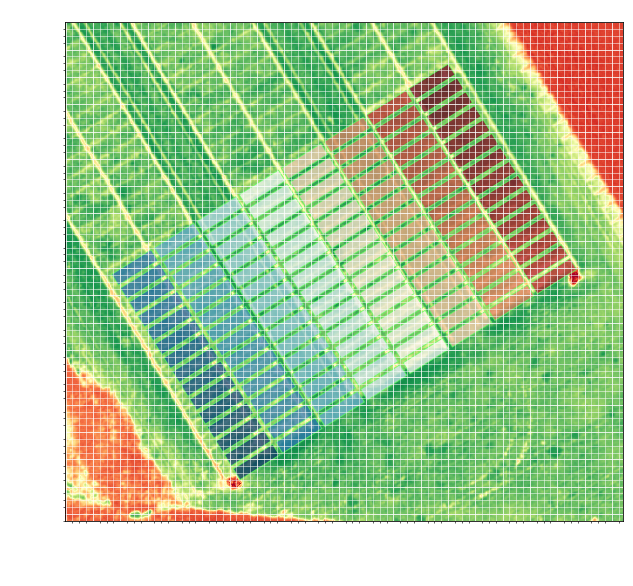

In [9]:
plot_grid(poly,ndvi)